In [4]:
# Reading the dataset
import pandas as pd

data = pd.read_csv("salaries.csv")
data.head(100)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
import seaborn as sns


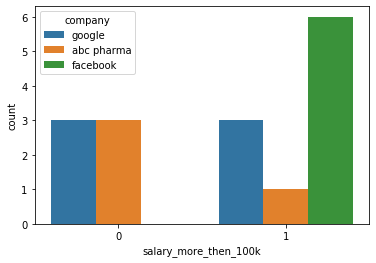

In [8]:
sns.countplot(x ='salary_more_then_100k',hue = 'company', data = data )

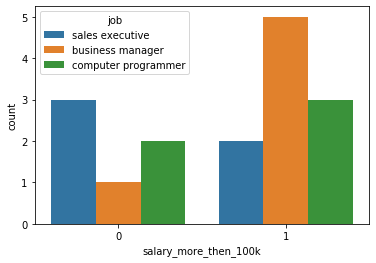

In [9]:
sns.countplot(x ='salary_more_then_100k',hue = 'job', data = data )

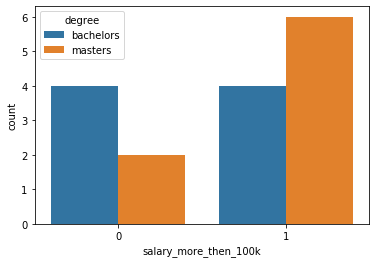

In [10]:
sns.countplot(x ='salary_more_then_100k',hue = 'degree', data = data )

In [11]:
inputs = data.drop('salary_more_then_100k', axis=1)
target = data['salary_more_then_100k']

In [12]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [13]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
inputs['comany_n'] = le.fit_transform(inputs['company'])
inputs['job_n'] = le.fit_transform(inputs['job'])
inputs['degree_n'] = le.fit_transform(inputs['degree'])

inputs.head()

,company,job,degree,comany_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [18]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis = 1)
inputs_n.head()

,comany_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [19]:
# Model
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [20]:
# Fitting
model.fit(inputs_n,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
model.score(inputs_n, target)

1.0

In [23]:
model.predict([[2,2,1]])

array([0], dtype=int64)